In [1]:
'''Analisis:
- All the data (list = patient with all values)
- BandPower = patient = 12 brain reagions = 5 bands = 1 value
- Lavels structure all patiens with one value = list (no shape)'''

'Analisis:\n- All the data (list = patient with all values)\n- BandPower = patient = 12 brain reagions = 5 bands = 1 value\n- Lavels structure all patiens with one value = list (no shape)'

In [2]:
#Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.
import numpy as np
import matplotlib.pyplot as plt
from numpy import savetxt
import pickle
import csv
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.utils import shuffle
import random
import sklearn.metrics as sm
import statistics
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import multiprocessing
import xgboost as xgb
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
import warnings
warnings.filterwarnings("ignore")
import datetime
starttime = datetime.datetime.now()
import csv
from scipy import stats
import numpy as np
import collections, numpy

def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg

In [3]:
with open("/Users/laianavarroolivella/Proyectos/EEG/2.banpowerEpoch12BR/list_finalEO.txt", "rb") as fp:   # Unpickling
    withEpoch = pickle.load(fp)

with open("/Users/laianavarroolivella/Proyectos/EEG/1.dataToBrainReagions/sorted_list_EO.txt", "rb") as fp:   # Unpickling
    sorted_list_EC_up = pickle.load(fp)

In [4]:
#Import the data to analise
#Open the file in universal line ending mode 
with open('/Users/laianavarroolivella/Proyectos/EEG/Files_EEG/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  data = {}
  reader = csv.DictReader(infile)
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_wellBeing = data['TeiQueSF_well_being']
TeiQueSF_total = data['TeiQueSF_total']

In [5]:
xCorr = []
for e in range(0,len(sorted_list_EC_up)):       #For each frequency band:
    hename = sorted_list_EC_up[e]   #Select the name of the patient
    hename = str(hename[:-7])  #Select only the number witout the extension 
    if hename in names:    #If this is in the testNames:
        indices = [i for i, s in enumerate(names) if hename in s] #Get the position of the testNames
        x = (float(TeiQueSF_emotionality[int(indices[0])])) #Get the value of the patient in the test selected
        xCorr.append(x) #Add it in to the xCorr
    else:
        print("No esta"+hename)

In [6]:
d = np.array(withEpoch) 
print(d.shape)
p = d.T
d = p.reshape(60,187)
df = d.T
print(df.shape)
pca = PCA(n_components = 20)
c2 = pca.fit_transform(df)
print(c2.shape)

(12, 5, 187)
(187, 60)
(187, 20)


In [7]:
#Lavels
Y = np.array(xCorr)
print(type(Y))
print(Y.shape)

<class 'numpy.ndarray'>
(187,)


KNeighborsClassifier

**************************************************** 0.1
     --
Counter({1: 74, 0: 52})
     Pred:  [0 1 1 1 1 1 0 1 1 0 0 1 1 0]
     Data:  [0 1 0 0 1 1 1 0 0 0 0 1 0 1]
     ACC 0.5
     F1 0.5333333333333333
     Recal 0.6666666666666666
     Precision 0.4444444444444444
     --
Counter({1: 72, 0: 54})
     Pred:  [0 1 1 0 0 0 1 1 0 0 1 1 1 0]
     Data:  [1 1 1 1 0 0 1 0 1 1 0 0 0 1]
     ACC 0.35714285714285715
     F1 0.39999999999999997
     Recal 0.375
     Precision 0.42857142857142855
     --
Counter({1: 70, 0: 56})
     Pred:  [1 1 1 1 1 0 0 1 1 1 1 1 1 1]
     Data:  [1 0 1 0 1 1 1 1 0 1 1 1 0 1]
     ACC 0.5714285714285714
     F1 0.7272727272727272
     Recal 0.8
     Precision 0.6666666666666666
     --
Counter({1: 72, 0: 54})
     Pred:  [1 0 0 1 1 1 0 0 1 0 1 1 0 0]
     Data:  [1 0 0 0 1 1 0 1 0 1 1 1 0 1]
     ACC 0.6428571428571429
     F1 0.6666666666666666
     Recal 0.625
     Precision 0.7142857142857143
     --
Counter({1: 74, 0: 52})
     Pred:  [1 1 1 1 0 1

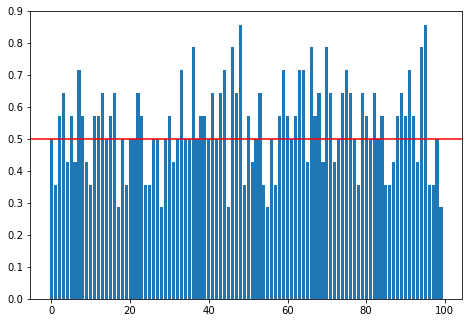

0.5378571428571429
**************************************************** 0.2
     --
Counter({1: 65, 0: 47})
     Pred:  [1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0]
     Data:  [0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0]
     ACC 0.4642857142857143
     F1 0.5714285714285715
     Recal 0.6666666666666666
     Precision 0.5
     --
Counter({1: 65, 0: 47})
     Pred:  [0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1]
     Data:  [0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1]
     ACC 0.5714285714285714
     F1 0.625
     Recal 0.6666666666666666
     Precision 0.5882352941176471
     --
Counter({1: 65, 0: 47})
     Pred:  [1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1]
     Data:  [0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1]
     ACC 0.5
     F1 0.5882352941176471
     Recal 0.6666666666666666
     Precision 0.5263157894736842
     --
Counter({1: 61, 0: 51})
     Pred:  [1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1

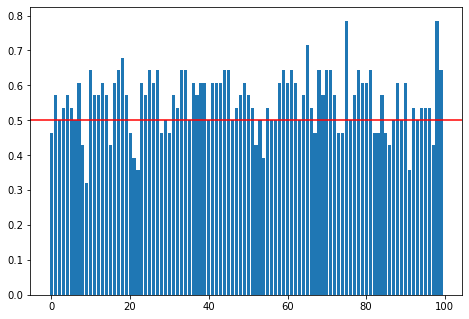

0.5542857142857143
**************************************************** 0.3
     --
Counter({1: 54, 0: 44})
     Pred:  [1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1
 1 1 1 0 0]
     Data:  [1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1
 1 0 1 0 0]
     ACC 0.5952380952380952
     F1 0.6909090909090909
     Recal 0.7307692307692307
     Precision 0.6551724137931034
     --
Counter({1: 62, 0: 36})
     Pred:  [1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1]
     Data:  [0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0
 1 1 1 1 0]
     ACC 0.47619047619047616
     F1 0.5416666666666666
     Recal 0.7222222222222222
     Precision 0.43333333333333335
     --
Counter({1: 61, 0: 37})
     Pred:  [1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 0]
     Data:  [1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1
 1 0 1

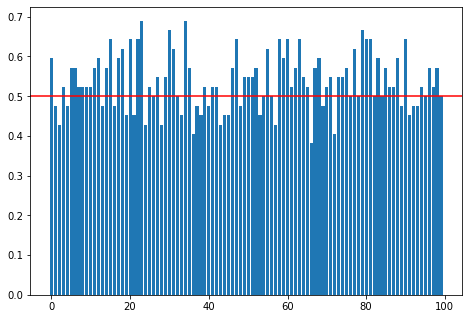

0.5371428571428573
**************************************************** 0.4
     --
Counter({1: 49, 0: 35})
     Pred:  [1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1
 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1]
     Data:  [1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1
 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1]
     ACC 0.5
     F1 0.6
     Recal 0.6774193548387096
     Precision 0.5384615384615384
     --
Counter({1: 48, 0: 36})
     Pred:  [0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1]
     Data:  [1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1]
     ACC 0.48214285714285715
     F1 0.6027397260273972
     Recal 0.6875
     Precision 0.5365853658536586
     --
Counter({1: 49, 0: 35})
     Pred:  [0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0

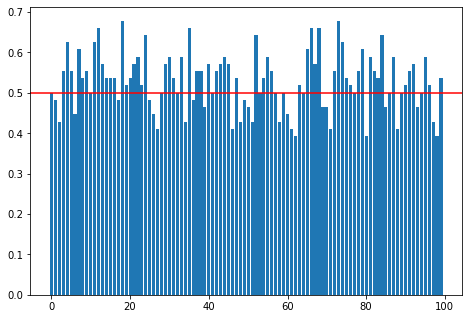

0.5283928571428573


In [8]:

xin = list(range(100))
th=5.0
numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
accurt = [] #SAVE THE ACCURACY
f1scoret = []
recallscrt = []
presitt = []
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    f1score = []
    recallscr = []
    presit = []
    for t in range(0,100):
        print("     --")
        c = list(zip(c2, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th and r<60:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)


        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA

        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)
            xgb_model = neighbors.KNeighborsClassifier()           
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC", accuracy_score(y_true=testY, y_pred=predY))
            accur.append(accuracy_score(y_true=testY, y_pred=predY))            
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            f1score.append(float(f1_score(y_true=testY, y_pred=predY)))   
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            recallscr.append(recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            presit.append(precision_score(y_true=testY, y_pred=predY))

        else:
            accur.append(0)
            print('     Bad division')
    accurt.append(accur)
    f1scoret.append(f1score)
    recallscrt.append(recallscr)
    presitt.append(presit)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.axhline(y=0.5, color='r', linestyle='-')
    ax.bar(xin,accur)
    plt.show()
    print(cal_average(accur))

In [9]:
for i in range(0, len(accurt)):
    print('Av', cal_average(accurt[i]))
    print('F1',cal_average(f1scoret[i]))
    print('rec', cal_average(recallscrt[i]))
    print('pres', cal_average(presitt[i]))
    print(" ")

Av 0.5378571428571429
F1 0.6170025985366538
rec 0.6845766178266178
pres 0.5910389887889889
 
Av 0.5542857142857143
F1 0.638634852051367
rec 0.6914246625893212
pres 0.6066245762825889
 
Av 0.5371428571428573
F1 0.62751430754587
rec 0.7078070480774302
pres 0.5735230851204485
 
Av 0.5283928571428573
F1 0.6202633346990083
rec 0.6842593024951243
pres 0.5797726385855377
 


XGBClassifier

**************************************************** 0.1
     --
Counter({1: 73, 0: 53})
     Pred:  [1 1 1 1 1 1 1 1 1 1 0 0 0 1]
     Data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0]
     ACC 0.42857142857142855
     F1 0.5555555555555556
     Recal 0.7142857142857143
     Precision 0.45454545454545453
     --
Counter({1: 71, 0: 55})
     Pred:  [1 0 0 1 1 1 1 0 0 1 1 1 0 0]
     Data:  [0 1 1 1 1 1 0 1 1 0 0 1 0 1]
     ACC 0.35714285714285715
     F1 0.47058823529411764
     Recal 0.4444444444444444
     Precision 0.5
     --
Counter({1: 74, 0: 52})
     Pred:  [0 1 1 1 0 1 1 0 0 0 1 1 0 0]
     Data:  [1 1 0 1 0 0 0 0 0 1 1 0 0 1]
     ACC 0.5
     F1 0.4615384615384615
     Recal 0.5
     Precision 0.42857142857142855
     --
Counter({1: 72, 0: 54})
     Pred:  [1 0 1 1 1 0 1 0 1 1 1 0 0 0]
     Data:  [1 1 1 1 0 1 0 0 1 0 1 0 1 0]
     ACC 0.5714285714285714
     F1 0.625
     Recal 0.625
     Precision 0.625
     --
Counter({1: 73, 0: 53})
     Pred:  [1 0 0 1 0 1 0 0 1 1 1 1 1 0]
     Dat

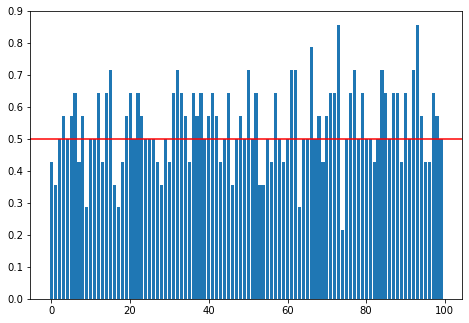

0.5400000000000003
**************************************************** 0.2
     --
Counter({1: 62, 0: 50})
     Pred:  [0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1]
     Data:  [1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1]
     ACC 0.6071428571428571
     F1 0.7027027027027027
     Recal 0.7222222222222222
     Precision 0.6842105263157895
     --
Counter({1: 69, 0: 43})
     Pred:  [0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
     Data:  [0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1]
     ACC 0.5357142857142857
     F1 0.6060606060606061
     Recal 0.9090909090909091
     Precision 0.45454545454545453
     --
Counter({1: 62, 0: 50})
     Pred:  [0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0]
     Data:  [0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1]
     ACC 0.4642857142857143
     F1 0.5161290322580646
     Recal 0.4444444444444444
     Precision 0.6153846153846154
     --
Counter({1: 63, 0: 49})
     Pred:  [0 1 1

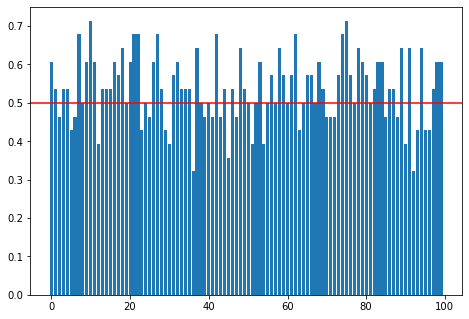

0.537142857142857
**************************************************** 0.3
     --
Counter({1: 54, 0: 44})
     Pred:  [0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1
 1 1 1 1 1]
     Data:  [1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0
 1 1 1 0 0]
     ACC 0.4523809523809524
     F1 0.5818181818181819
     Recal 0.6153846153846154
     Precision 0.5517241379310345
     --
Counter({1: 58, 0: 40})
     Pred:  [1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 0 1 1 1]
     Data:  [0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0
 1 1 1 1 1]
     ACC 0.5952380952380952
     F1 0.679245283018868
     Recal 0.8181818181818182
     Precision 0.5806451612903226
     --
Counter({1: 56, 0: 42})
     Pred:  [1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0
 1 1 0 1 1]
     Data:  [0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0
 1 0 1 1 1

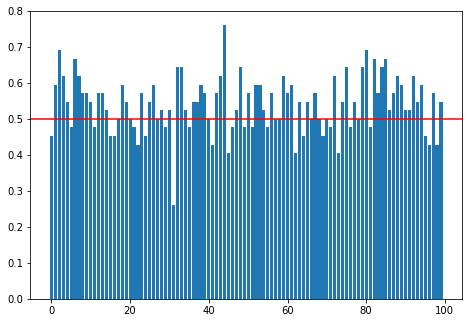

0.5404761904761906
**************************************************** 0.4
     --
Counter({1: 47, 0: 37})
     Pred:  [0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Data:  [0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0]
     ACC 0.5892857142857143
     F1 0.6933333333333334
     Recal 0.7878787878787878
     Precision 0.6190476190476191
     --
Counter({1: 48, 0: 36})
     Pred:  [0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1]
     Data:  [1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1
 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0]
     ACC 0.7142857142857143
     F1 0.7714285714285714
     Recal 0.84375
     Precision 0.7105263157894737
     --
Counter({1: 46, 0: 38})
     Pred:  [0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1
 0 0 0

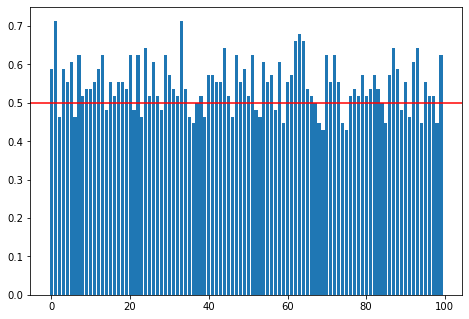

0.5471428571428573


In [10]:
xin = list(range(100))
th=5.0
numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
accurt = [] #SAVE THE ACCURACY
f1scoret = []
recallscrt = []
presitt = []
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    f1score = []
    recallscr = []
    presit = []
    for t in range(0,100):
        print("     --")
        c = list(zip(c2, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th and r<60:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)


        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA

        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)
            xgb_model = xgb.XGBClassifier(max_depth=6,learning_rate=0.1,n_estimators=50,
                                            objective='binary:logistic',booster='gbtree',n_jobs=20,
                                            subsample=0.9, colsample_bytree=0.9, colsample_bylevel=0.9,
                                            reg_alpha=0.5, reg_lambda=1.0,gamma=0,
                                            scale_pos_weight=1)           
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC", accuracy_score(y_true=testY, y_pred=predY))
            accur.append(accuracy_score(y_true=testY, y_pred=predY))            
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            f1score.append(float(f1_score(y_true=testY, y_pred=predY)))   
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            recallscr.append(recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            presit.append(precision_score(y_true=testY, y_pred=predY))

        else:
            accur.append(0)
            print('     Bad division')
    accurt.append(accur)
    f1scoret.append(f1score)
    recallscrt.append(recallscr)
    presitt.append(presit)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.axhline(y=0.5, color='r', linestyle='-')
    ax.bar(xin,accur)
    plt.show()
    print(cal_average(accur))

In [11]:
for i in range(0, len(accurt)):
    print('Av', cal_average(accurt[i]))
    print('F1',cal_average(f1scoret[i]))
    print('rec', cal_average(recallscrt[i]))
    print('pres', cal_average(presitt[i]))
    print(" ")

Av 0.5400000000000003
F1 0.5978770409157402
rec 0.6451962481962483
pres 0.5932557997557999
 
Av 0.537142857142857
F1 0.6166720515789706
rec 0.6739604161318556
pres 0.5869226792150133
 
Av 0.5404761904761906
F1 0.6255830789925948
rec 0.6808031235548152
pres 0.5908016640680869
 
Av 0.5471428571428573
F1 0.6213671315684379
rec 0.6627660655143525
pres 0.5987618605711397
 


Random forest classifier

**************************************************** 0.1
     --
Counter({1: 75, 0: 51})
     Pred:  [1 1 1 1 0 1 1 1 1 1 1 1 1 1]
     Data:  [1 1 0 0 0 1 0 0 1 0 1 0 0 0]
     ACC 0.42857142857142855
     F1 0.5555555555555556
     Recal 1.0
     Precision 0.38461538461538464
     --
Counter({1: 72, 0: 54})
     Pred:  [1 0 1 1 0 1 1 1 1 0 0 0 1 1]
     Data:  [0 0 1 0 0 1 0 1 1 0 1 1 1 1]
     ACC 0.6428571428571429
     F1 0.7058823529411765
     Recal 0.75
     Precision 0.6666666666666666
     --
Counter({1: 76, 0: 50})
     Pred:  [0 1 0 1 0 1 1 1 1 1 1 1 1 1]
     Data:  [0 0 0 0 0 0 1 0 0 1 0 1 1 0]
     ACC 0.5
     F1 0.5333333333333333
     Recal 1.0
     Precision 0.36363636363636365
     --
Counter({1: 72, 0: 54})
     Pred:  [0 1 1 0 1 1 0 1 0 0 1 1 0 1]
     Data:  [0 1 0 1 1 1 0 1 0 0 1 1 1 0]
     ACC 0.7142857142857143
     F1 0.75
     Recal 0.75
     Precision 0.75
     --
Counter({1: 73, 0: 53})
     Pred:  [1 1 1 1 1 1 0 1 1 1 0 1 1 1]
     Data:  [1 1 0 0 0 1 0 

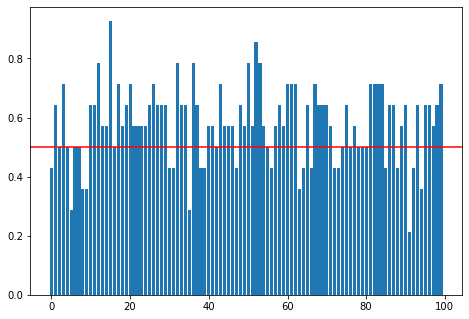

0.5800000000000004
**************************************************** 0.2
     --
Counter({1: 66, 0: 46})
     Pred:  [1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
     Data:  [1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0]
     ACC 0.6785714285714286
     F1 0.742857142857143
     Recal 0.9285714285714286
     Precision 0.6190476190476191
     --
Counter({1: 64, 0: 48})
     Pred:  [1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1]
     Data:  [1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1]
     ACC 0.6785714285714286
     F1 0.7272727272727272
     Recal 0.75
     Precision 0.7058823529411765
     --
Counter({1: 67, 0: 45})
     Pred:  [0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1]
     Data:  [1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1]
     ACC 0.39285714285714285
     F1 0.41379310344827586
     Recal 0.46153846153846156
     Precision 0.375
     --
Counter({1: 64, 0: 48})
     Pred:  [0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1

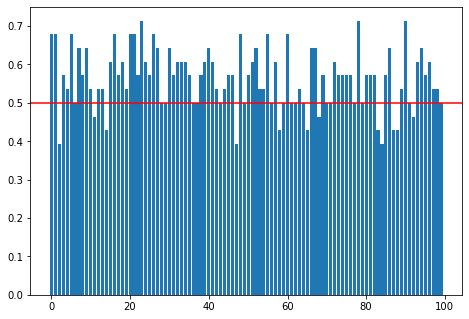

0.5635714285714286
**************************************************** 0.3
     --
Counter({1: 55, 0: 43})
     Pred:  [0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 1 0 1 0 1]
     Data:  [0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0
 1 0 1 1 1]
     ACC 0.47619047619047616
     F1 0.4761904761904762
     Recal 0.4
     Precision 0.5882352941176471
     --
Counter({1: 60, 0: 38})
     Pred:  [1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0
 1 1 1 1 1]
     Data:  [0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1
 1 0 0 0 0]
     ACC 0.42857142857142855
     F1 0.5
     Recal 0.6
     Precision 0.42857142857142855
     --
Counter({1: 54, 0: 44})
     Pred:  [1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0
 1 0 0 1 1]
     Data:  [1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1
 0 0 1 1 0]
     ACC 0.5476190476190477
     F1 0.

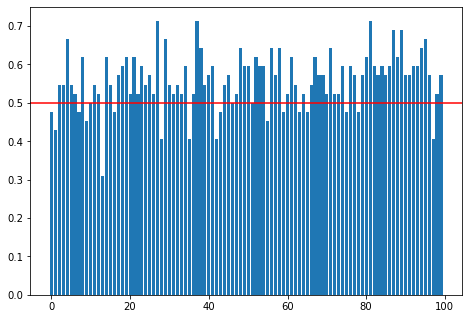

0.5592857142857143
**************************************************** 0.4
     --
Counter({1: 51, 0: 33})
     Pred:  [1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1
 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1]
     Data:  [1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1
 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1]
     ACC 0.5892857142857143
     F1 0.6567164179104478
     Recal 0.7586206896551724
     Precision 0.5789473684210527
     --
Counter({1: 44, 0: 40})
     Pred:  [0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0]
     Data:  [0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1]
     ACC 0.48214285714285715
     F1 0.49122807017543857
     Recal 0.3888888888888889
     Precision 0.6666666666666666
     --
Counter({1: 46, 0: 38})
     Pred:  [0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1

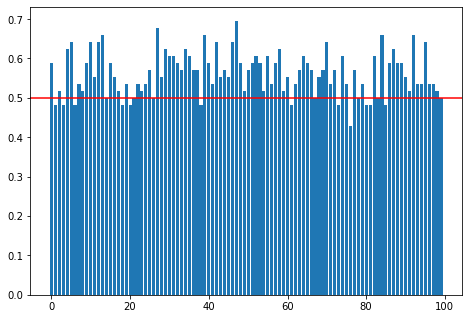

0.5626785714285714


In [12]:
xin = list(range(100))
th=5.0
numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
accurt = [] #SAVE THE ACCURACY
f1scoret = []
recallscrt = []
presitt = []
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    f1score = []
    recallscr = []
    presit = []
    for t in range(0,100):
        print("     --")
        c = list(zip(c2, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th and r<60:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)


        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA

        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)
            xgb_model = RandomForestClassifier(max_depth=30, random_state=0)       
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC", accuracy_score(y_true=testY, y_pred=predY))
            accur.append(accuracy_score(y_true=testY, y_pred=predY))            
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            f1score.append(float(f1_score(y_true=testY, y_pred=predY)))   
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            recallscr.append(recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            presit.append(precision_score(y_true=testY, y_pred=predY))

        else:
            accur.append(0)
            print('     Bad division')
    accurt.append(accur)
    f1scoret.append(f1score)
    recallscrt.append(recallscr)
    presitt.append(presit)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.axhline(y=0.5, color='r', linestyle='-')
    ax.bar(xin,accur)
    plt.show()
    print(cal_average(accur))

In [13]:
for i in range(0, len(accurt)):
    print('Av', cal_average(accurt[i]))
    print('F1',cal_average(f1scoret[i]))
    print('rec', cal_average(recallscrt[i]))
    print('pres', cal_average(presitt[i]))
    print(" ")

Av 0.5800000000000004
F1 0.6382999758127632
rec 0.7010894660894661
pres 0.6256654734154734
 
Av 0.5635714285714286
F1 0.635238007370166
rec 0.6829271896833817
pres 0.6082739418155021
 
Av 0.5592857142857143
F1 0.6218800383776848
rec 0.6701292006423134
pres 0.5917949228787325
 
Av 0.5626785714285714
F1 0.6367026942247881
rec 0.6715630210855436
pres 0.6193949184270668
 


gaussian nb

**************************************************** 0.1
     --
Counter({1: 73, 0: 53})
     Pred:  [1 1 1 1 1 1 0 1 1 1 1 1 1 1]
     Data:  [0 1 1 0 0 1 0 1 1 1 0 0 0 1]
     ACC 0.5714285714285714
     F1 0.7000000000000001
     Recal 1.0
     Precision 0.5384615384615384
     --
Counter({1: 75, 0: 51})
     Pred:  [1 1 1 1 0 1 0 1 1 1 1 1 1 1]
     Data:  [0 0 0 0 1 1 0 1 0 0 0 1 0 1]
     ACC 0.35714285714285715
     F1 0.47058823529411764
     Recal 0.8
     Precision 0.3333333333333333
     --
Counter({1: 69, 0: 57})
     Pred:  [1 1 1 1 1 1 1 1 1 1 0 1 1 1]
     Data:  [1 1 1 1 1 1 1 1 1 0 1 0 1 0]
     ACC 0.7142857142857143
     F1 0.8333333333333333
     Recal 0.9090909090909091
     Precision 0.7692307692307693
     --
Counter({1: 73, 0: 53})
     Pred:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Data:  [1 1 0 0 0 0 1 1 1 1 1 0 0 0]
     ACC 0.5
     F1 0.6666666666666666
     Recal 1.0
     Precision 0.5
     --
Counter({1: 73, 0: 53})
     Pred:  [1 0 1 1 0 1 1 1 0 1 1 1 1 1]
  

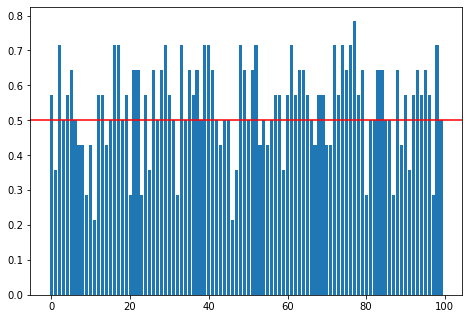

0.5392857142857145
**************************************************** 0.2
     --
Counter({1: 61, 0: 51})
     Pred:  [1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1]
     Data:  [0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0]
     ACC 0.42857142857142855
     F1 0.6
     Recal 0.631578947368421
     Precision 0.5714285714285714
     --
Counter({1: 65, 0: 47})
     Pred:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Data:  [1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1]
     ACC 0.5357142857142857
     F1 0.6976744186046512
     Recal 1.0
     Precision 0.5357142857142857
     --
Counter({1: 62, 0: 50})
     Pred:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Data:  [0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1]
     ACC 0.6428571428571429
     F1 0.782608695652174
     Recal 1.0
     Precision 0.6428571428571429
     --
Counter({1: 63, 0: 49})
     Pred:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

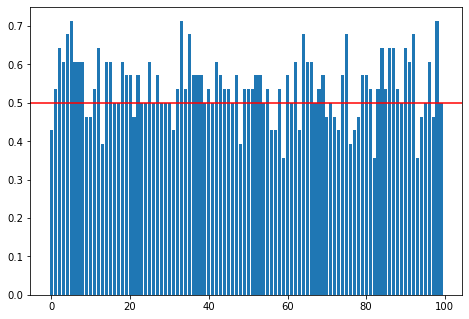

0.5410714285714284
**************************************************** 0.3
     --
Counter({1: 56, 0: 42})
     Pred:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]
     Data:  [1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 1]
     ACC 0.5714285714285714
     F1 0.7272727272727273
     Recal 1.0
     Precision 0.5714285714285714
     --
Counter({1: 58, 0: 40})
     Pred:  [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]
     Data:  [1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1
 0 1 1 1 0]
     ACC 0.5476190476190477
     F1 0.6885245901639344
     Recal 0.9545454545454546
     Precision 0.5384615384615384
     --
Counter({1: 54, 0: 44})
     Pred:  [1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1
 0 1 0 1 0]
     Data:  [0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1
 1 0 1 1 0]
     ACC 0.

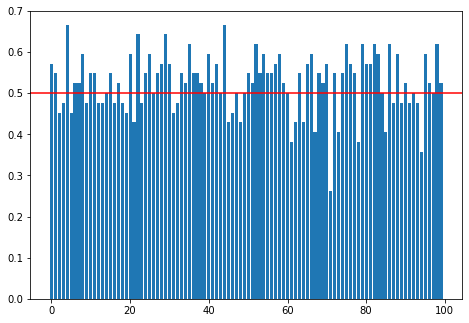

0.524761904761905
**************************************************** 0.4
     --
Counter({1: 49, 0: 35})
     Pred:  [0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1]
     Data:  [1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1]
     ACC 0.48214285714285715
     F1 0.6027397260273972
     Recal 0.7096774193548387
     Precision 0.5238095238095238
     --
Counter({1: 51, 0: 33})
     Pred:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Data:  [0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1
 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1]
     ACC 0.5178571428571429
     F1 0.6823529411764707
     Recal 1.0
     Precision 0.5178571428571429
     --
Counter({1: 48, 0: 36})
     Pred:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1

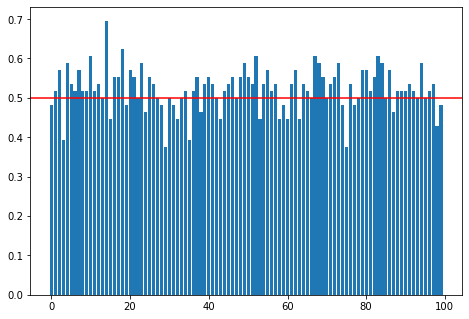

0.5225


In [14]:
xin = list(range(100))
th=5.0
numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
accurt = [] #SAVE THE ACCURACY
f1scoret = []
recallscrt = []
presitt = []
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    f1score = []
    recallscr = []
    presit = []
    for t in range(0,100):
        print("     --")
        c = list(zip(c2, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th and r<60:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)


        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA

        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)
            xgb_model = GaussianNB()       
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC", accuracy_score(y_true=testY, y_pred=predY))
            accur.append(accuracy_score(y_true=testY, y_pred=predY))            
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            f1score.append(float(f1_score(y_true=testY, y_pred=predY)))   
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            recallscr.append(recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            presit.append(precision_score(y_true=testY, y_pred=predY))

        else:
            accur.append(0)
            print('     Bad division')
    accurt.append(accur)
    f1scoret.append(f1score)
    recallscrt.append(recallscr)
    presitt.append(presit)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.axhline(y=0.5, color='r', linestyle='-')
    ax.bar(xin,accur)
    plt.show()
    print(cal_average(accur))

In [15]:
for i in range(0, len(accurt)):
    print('Av', cal_average(accurt[i]))
    print('F1',cal_average(f1scoret[i]))
    print('rec', cal_average(recallscrt[i]))
    print('pres', cal_average(presitt[i]))
    print(" ")

Av 0.5392857142857145
F1 0.6783537831247886
rec 0.9016915584415582
pres 0.5625502830502828
 
Av 0.5410714285714284
F1 0.6852820383486861
rec 0.9116107458502967
pres 0.5625991047536243
 
Av 0.524761904761905
F1 0.6649416786432907
rec 0.8607071434257338
pres 0.5521890763109547
 
Av 0.5225
F1 0.6597220748002812
rec 0.8424491211489855
pres 0.5550650034318572
 
